In [1]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="lite-model_deeplabv3_1_metadata_2.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
input_details

[{'name': 'sub_7',
  'index': 183,
  'shape': array([  1, 257, 257,   3], dtype=int32),
  'shape_signature': array([  1, 257, 257,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [2]:
output_details = interpreter.get_output_details()
output_details

[{'name': 'ResizeBilinear_3',
  'index': 168,
  'shape': array([  1, 257, 257,  21], dtype=int32),
  'shape_signature': array([  1, 257, 257,  21], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [3]:
from PIL import Image

im = Image.open("image.jpg")

(612, 408)


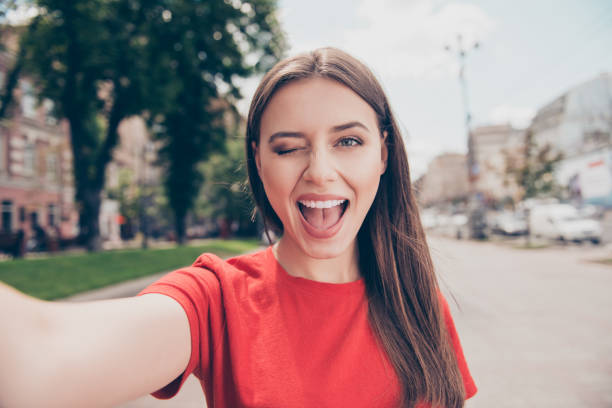

In [4]:
print(im.size)
im

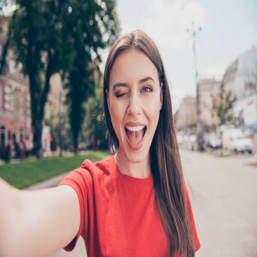

In [5]:
res_im = im.resize((257, 257))
res_im

In [6]:
np_res_im = np.array(res_im)
np_res_im = (np_res_im/255).astype('float32')
np_res_im

array([[[0.44705883, 0.49019608, 0.54901963],
        [0.5254902 , 0.58431375, 0.627451  ],
        [0.58431375, 0.65882355, 0.69411767],
        ...,
        [0.7529412 , 0.827451  , 0.84313726],
        [0.7490196 , 0.827451  , 0.84705883],
        [0.74509805, 0.827451  , 0.84705883]],

       [[0.4509804 , 0.5372549 , 0.5803922 ],
        [0.5568628 , 0.627451  , 0.6627451 ],
        [0.6039216 , 0.6509804 , 0.6862745 ],
        ...,
        [0.75686276, 0.827451  , 0.84313726],
        [0.7490196 , 0.827451  , 0.84705883],
        [0.74509805, 0.827451  , 0.84705883]],

       [[0.54901963, 0.67058825, 0.7019608 ],
        [0.6156863 , 0.6901961 , 0.7176471 ],
        [0.6313726 , 0.654902  , 0.6745098 ],
        ...,
        [0.7607843 , 0.83137256, 0.84705883],
        [0.7490196 , 0.827451  , 0.84705883],
        [0.74509805, 0.827451  , 0.84705883]],

       ...,

       [[0.6784314 , 0.5568628 , 0.5411765 ],
        [0.7058824 , 0.58431375, 0.56078434],
        [0.7294118 , 0

In [7]:
input_details[0]['shape']

array([  1, 257, 257,   3], dtype=int32)

In [8]:
np_res_im.shape

(257, 257, 3)

In [9]:
if len(np_res_im.shape) == 3:
    np_res_im = np.expand_dims(np_res_im, 0)
# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np_res_im
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
output_data

array([[[[ 1.97529964e+01,  2.31925893e+00,  3.44404626e+00, ...,
           3.96616220e+00,  6.35029125e+00,  3.43795419e-02],
         [ 1.97874336e+01,  2.37985134e+00,  3.46521568e+00, ...,
           3.90728068e+00,  6.42983532e+00,  1.09727971e-01],
         [ 1.98218689e+01,  2.44044399e+00,  3.48638535e+00, ...,
           3.84839916e+00,  6.50937891e+00,  1.85076401e-01],
         ...,
         [ 1.95040436e+01,  3.03574038e+00,  2.77231407e+00, ...,
           1.40177488e+00,  6.68132305e+00,  2.13466883e+00],
         [ 1.94466171e+01,  3.02230167e+00,  2.77970743e+00, ...,
           1.39395833e+00,  6.63173532e+00,  2.12752008e+00],
         [ 1.93891926e+01,  3.00886297e+00,  2.78710055e+00, ...,
           1.38614178e+00,  6.58214808e+00,  2.12037158e+00]],

        [[ 1.97114391e+01,  2.34127998e+00,  3.46605730e+00, ...,
           3.89961076e+00,  6.33286476e+00, -3.90989333e-03],
         [ 1.97462425e+01,  2.39672804e+00,  3.48910379e+00, ...,
           3.85010266e

In [10]:
output_data.shape

(1, 257, 257, 21)

In [11]:
output_data[0].shape

(257, 257, 21)

In [12]:
labelsArrays = ["background", "aeroplane", "bicycle", "bird", "boat", "bottle", "bus",
      "car", "cat", "chair", "cow", "dining table", "dog", "horse", "motorbike",
      "person", "potted plant", "sheep", "sofa", "train", "tv"]

In [13]:
mSegmentBits = np.zeros((257,257)).astype(int)
outputbitmap = np.zeros((257,257)).astype(int)
for y in range(257):
    for x in range(257):
        maxval = 0
        mSegmentBits[x][y]=0
        
        for c in range(21):
            value = output_data[0][y][x][c]
            if c == 0 or value > maxVal:
                maxVal = value
                mSegmentBits[y][x] = c
#         print(mSegmentBits[x][y])
        label = labelsArrays[mSegmentBits[x][y]]
#         print(label)
        if(mSegmentBits[y][x]==15):
            outputbitmap[y][x]=1
        else:
            outputbitmap[y][x]=0

In [14]:
outputbitmap

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

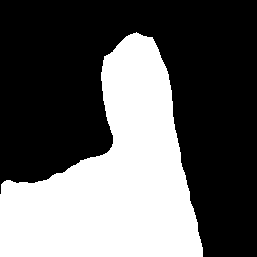

In [15]:
from PIL import Image
temp_outputbitmap= outputbitmap*255
PIL_image = Image.fromarray(np.uint8(temp_outputbitmap)).convert('L')
PIL_image

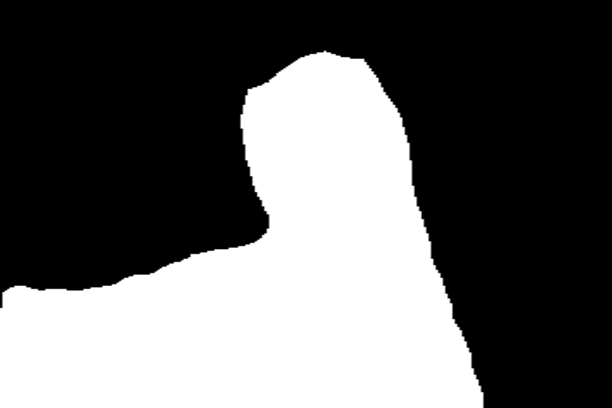

In [16]:
org_mask_img = PIL_image.resize(im.size)
org_mask_img